In [96]:
#import scripting
import sys
sys.path.insert(0, "../build")
from scripting import *

import beadquality as bq
#import pandas as pd

In [3]:
#Load the track, put the path of the track file
#track = Track("/media/sandra/sirius/Andreas/ssHP6_Sequencing_20171220/AGC_1nM/Test_022_043_AGC_1nM_OR3_20nM_ssHP6_FOV1.trk") #, match=".*_043_(\w\w\w)_.*")
track = Track("../../Documents/local_test_data/tests/ssHP6_Sequencing_20171220/AGC_3nM/Test_022_043_AGC_3nM_OR3_20nM_ssHP6_FOV1.trk")
#track = Track("/media/sandra/sirius/Andreas/ssHP6_Sequencing_20171220/AGC_1nM/Test_022_043_AGC_1nM_OR3_20nM_ssHP6_FOV1.trk")

In [4]:
track.key = 'AGC'

In [5]:
#Load the tracks, put the path of the data folder
#We can load .trk or .pk
#tracks = TracksDict("../../Documents/local_test_data/ssHP6_Sequencing_20171220//*.pk")
tracks = TracksDict("../../Documents/local_test_data/tests/ssHP6_Sequencing_20171220/*/*.trk", match=".*_043_(\w\w\w)_.*")


#the chronological order can be extracted from the .trk files
#tracks_original = TracksDict("/media/sandra/sirius/Andreas/ssHP6_Sequencing_20171220/*/*.trk", match=".*_043_(\w\w\w)_.*")

In [6]:
resume = bq.resumeTracksQuality(tracks)

In [7]:
resume_single= bq.resumeTracksQuality(track)


In [8]:
resume

,Good,Bad,Total
Track,,,
GCA,39,70,109
GTG,42,67,109
GGA,45,64,109
CGT,50,59,109
CAG,52,57,109
TGA,28,81,109
GGT,42,67,109
OR3,61,48,109
GAG,48,61,109


In [9]:
df_dfGoodBadBeads = bq.dfGoodBadBeads(tracks)

In [10]:
df_dfGoodBadBeads_single = bq.dfGoodBadBeads(track)

In [73]:
#Assign variables order for tracks and beads
order_tracks_best_single = [str(track.key)]
order_tracks_chrono_single = list(df_dfGoodBadBeads_single.set_index('bead').columns.values)

order_tracks_chrono = list(tracks.dataframe().set_index('key').sort_values(by='modification').index.values)
order_tracks_best = list(df_dfGoodBadBeads.set_index('bead').columns.values)

order_beads_normal_single = list(track.beadsonly.keys()) 
order_beads_best_single = list(df_dfGoodBadBeads_single['bead'].values)

order_beads_normal = tracks.availablebeads()
order_beads_best = list(df_dfGoodBadBeads['bead'].values)

In [12]:
df_resumeBeadsQuality_single = bq.resumeBeadsQuality(track)

In [13]:
df_typeError_single = bq.typeError(df_resumeBeadsQuality_single,order_beads_best_single,order_tracks_chrono_single)


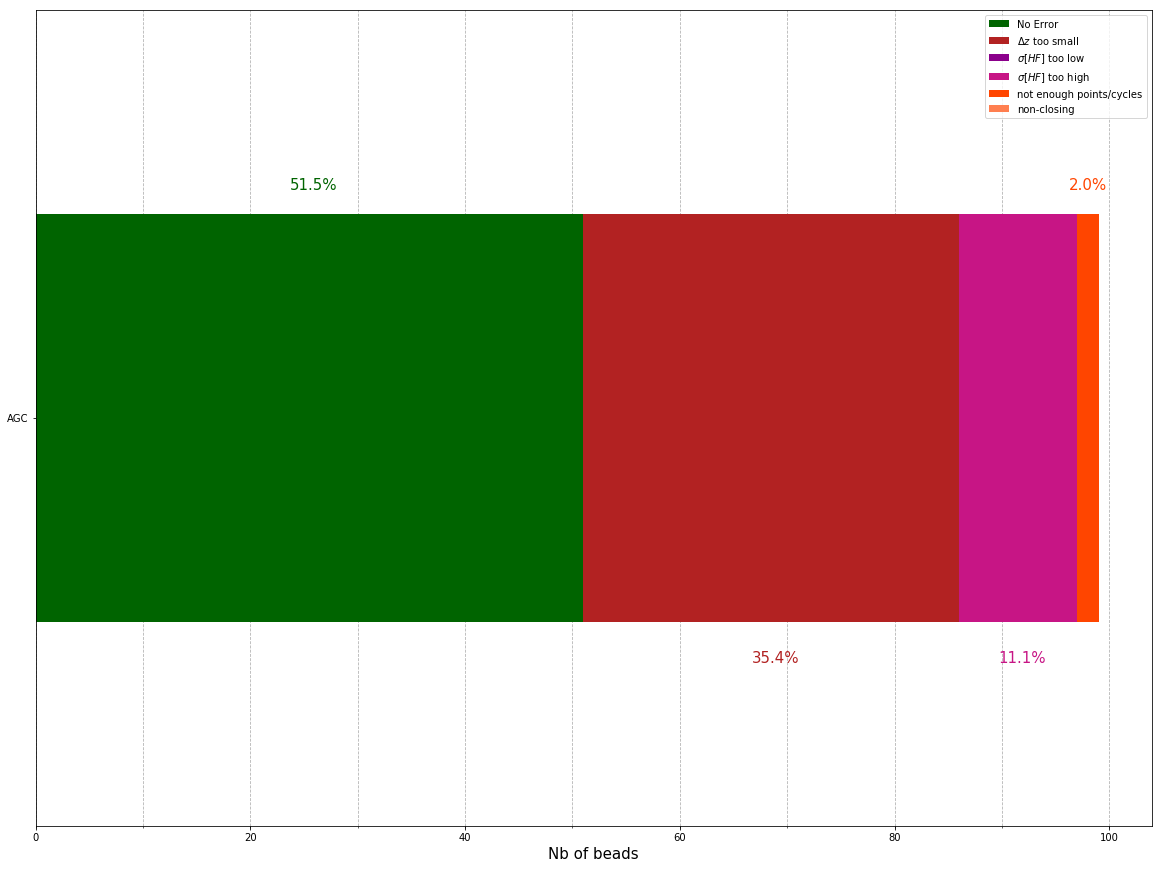

In [14]:
bq.barBeadsByType(df_typeError_single,order_tracks_chrono_single)
plt.show()

In [20]:
dfmsg_single= bq.dfCleaningMessages(track,order_beads_normal_single)
dfmsg_single

,index,NbErrors,bead,track,typeOfError
0,0,13,1,AGC,hfsigma>0.01
1,1,2,1,AGC,extent<0.5
2,2,106,2,AGC,sat>90%
3,3,6,2,AGC,extent<0.5
4,4,74,3,AGC,pop<80%
5,5,1,3,AGC,hfsigma<0.0001
6,6,111,3,AGC,hfsigma>0.01
7,7,23,6,AGC,extent<0.5
8,8,112,9,AGC,extent<0.5
9,9,80,12,AGC,pop<80%


In [21]:
%%output size = 300
%%opts Bars [category_index=2 stack_index=0 group_index=1 legend_position='top' legend_cols=7 color_by=['stack'] tools=['hover']] 
%%opts Bars.Stacked [stack_index='typeOfError'  ]  
%%opts Bars (color=Cycle(values=["#B22222","#8B008B","#C71585", "#FF4500","#FF7F50"]))
%%opts Bars.Stacked (color=Cycle(values=["#B22222","#8B008B","#C71585", "#FF4500","#FF7F50"]))

hvbar_single = bq.barBeads(track,df_dfGoodBadBeads_single,dfmsg_single,order_tracks_chrono_single,order_beads_normal_single)
hvbar_single

/home/sandra/miniconda3/lib/python3.6/site-packages/bokeh/models/sources.py:137: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('Count', 5), ('bottom', 5), ('top', 5), ('typeOfError', 15)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


:DynamicMap   [bead]

In [29]:
df_resumeBeadsQuality = bq.resumeBeadsQuality(tracks,order_tracks_chrono)

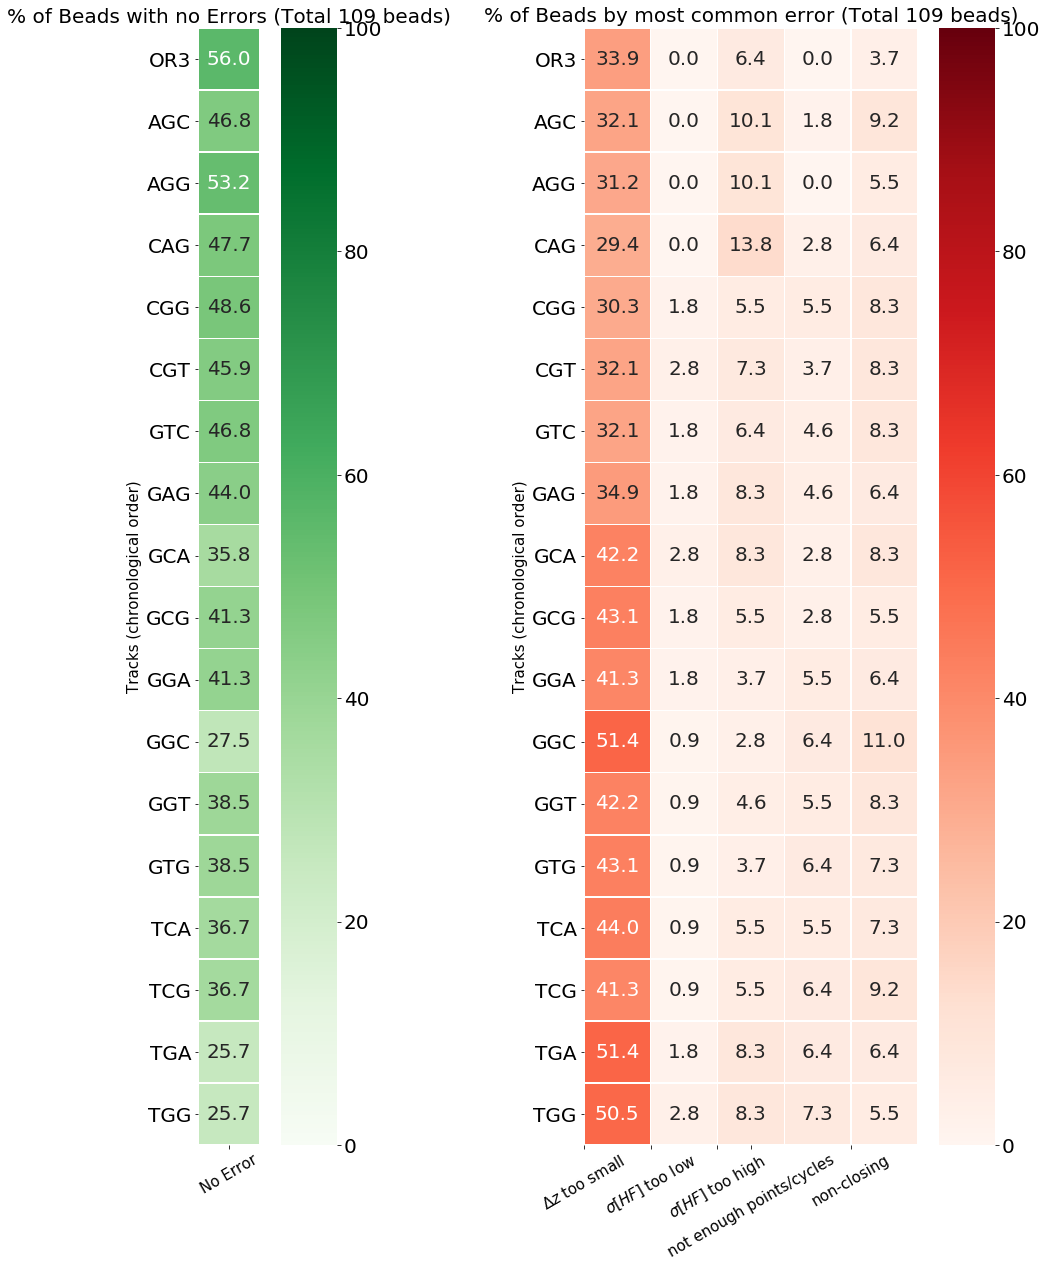

In [74]:
bq.heatmapBeadsByType(df_resumeBeadsQuality,order_tracks_chrono) #pc = True for percentages, False for # // order = 'chrono' or 'best_to_worst'
plt.show()

In [99]:
#p = bq.heatmapGoodBad(df_dfGoodBadBeads,order_tracks_chrono)
#from bokeh.io import show
#show(p)

In [100]:
plot = bq.heatmapGoodBadDetailed(df_resumeBeadsQuality,order_tracks_chrono,order_beads_best)
show(plot)

In [101]:
df_typeError = bq.typeError(df_resumeBeadsQuality,order_beads_best,order_tracks_chrono)